# **Bike Price Prediction using Linear Regression**

# **Import Library**

In [ ]:
import pandas as pd
import numpy as np

# **Import Data**

In [ ]:
df=pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Bike%20Prices.csv")

# **Get the first five rows of Dataframe**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


# **Get Information of Dataframe**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


# **Get Missing Values Drop**

In [ ]:
df= df.dropna()

# **Get the Summary Statistics**

In [ ]:
df.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,626.000000,626.000000,626.000000,6.260000e+02
mean,59445.164537,2014.800319,32671.576677,8.795871e+04
std,59904.350888,3.018885,45479.661039,7.749659e+04
min,6000.000000,2001.000000,380.000000,3.049000e+04
25%,30000.000000,2013.000000,13031.250000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,65000.000000,2017.000000,40000.000000,8.703150e+04
max,760000.000000,2020.000000,585659.000000,1.278000e+06


# **Get Categories and Counts of Categorical Variables**

In [ ]:
df[['Brand']].value_counts()

Brand   
Honda       170
Bajaj       143
Hero        108
Yamaha       94
Royal        40
TVS          23
Suzuki       18
KTM           6
Mahindra      6
Kawasaki      4
UM            3
Activa        3
Harley        2
Vespa         2
BMW           1
Hyosung       1
Benelli       1
Yo            1
dtype: int64

In [ ]:
df[['Model']].value_counts()

Model                                     
Honda Activa [2000-2015]                      23
Honda CB Hornet 160R                          22
Bajaj Pulsar 180                              20
Yamaha FZ S V 2.0                             16
Bajaj Discover 125                            16
                                              ..
Royal Enfield Thunderbird 500                  1
Royal Enfield Continental GT [2013 - 2018]     1
Royal Enfield Classic Stealth Black            1
Royal Enfield Classic Squadron Blue            1
Yo Style                                       1
Length: 183, dtype: int64

In [ ]:
df[['Seller_Type']].value_counts()


Seller_Type
Individual     623
Dealer           3
dtype: int64

In [ ]:
df[['Owner']].value_counts()

Owner    
1st owner    556
2nd owner     66
3rd owner      3
4th owner      1
dtype: int64

# **Get Column Names**

In [ ]:
df.columns


Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')

# **Get Shape of DataFrame**

In [ ]:
df.shape

(626, 8)

# **Get Encoding of Categorical Features**

In [ ]:
df.replace({'Seller_Type':{'Individual':0,'Dealer':1}},inplace=True)

In [ ]:
df.replace({'Owner':{'1st owner':0,'2nd owner':1,'3rd owner':2,'4th owner':3}},inplace=True)

In [ ]:
#X = pd.get_dummies(X, columns = ['Seller_Type','Owner'], drop_first =True)

# **Define y(dependent or label or target variable and X(independent or features or attribute Variable**

In [ ]:
y=df['Selling_Price']

In [ ]:
y.shape

(626,)

In [ ]:
y

0       30000
1       18000
2       20000
3       25000
4       24999
        ...  
621    330000
622    300000
623    425000
624    760000
625    750000
Name: Selling_Price, Length: 626, dtype: int64

In [ ]:
X = df[['Year','Seller_Type','Owner','KM_Driven','Ex_Showroom_Price']]

In [ ]:
#X = df.drop(['Brand','Model','Selling_Price'], axis=1)

In [ ]:
#X = df.drop(['Brand','Model','Selling_Price'], axis=1)
X.shape

(626, 5)

In [ ]:
X

,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,2017,0,0,8000,30490.0
1,2017,0,0,35000,32000.0
2,2011,0,0,10000,37675.0
3,2010,0,0,43000,42859.0
4,2012,0,1,35000,42859.0
...,...,...,...,...,...
621,2014,0,3,6500,534000.0
622,2011,0,0,12000,589000.0
623,2017,0,1,13600,599000.0
624,2019,0,0,2800,752020.0


# **Get Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train , X_test, y_train , y_test = train_test_split(X , y,train_size=0.7,random_state=182529)

In [ ]:
X_train.shape , X_test.shape, y_train.shape , y_test.shape

((438, 5), (188, 5), (438,), (188,))

# **Get Model Train**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr= LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

# **Get Model Prediction**

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
y_pred

array([ 55615.80162031,  25068.77589292, 134759.66392403, 104269.38799301,
        21204.29670335,  49810.79452953, 886875.53545557,  37834.64034556,
        78684.84191764,  32382.74591178,  54289.43912629,  27625.23044234,
        25130.29384456,  53437.48206725,  25008.28572123,  51434.42078048,
        49838.81676913,  59344.45137405,  24585.6567264 ,  29774.04098377,
        54948.04890392,  46123.67404185,  66174.89538897,  59142.69453492,
        16595.45993522,  64844.35279178,  24653.67590524,  50458.22299661,
        51186.78663732,  74720.28527811,  59273.02498279, 115582.15005916,
        68730.29037242, 141611.28957427,  36877.68198783,  45584.58691096,
        40762.53747666,  34025.5353102 ,  29452.25695019, 111562.38122178,
        39371.98757231,  57313.16134491,  36793.85614843, 129378.99801073,
        65545.07404788,  31980.63192969,  30772.09114285,  51745.28149384,
        22525.24774623,  29060.4232164 ,  57313.41182517, 109576.24719102,
        45631.49718739,  

In [ ]:
y_pred.shape

(188,)

# **Get Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error,  mean_absolute_error, r2_score

In [ ]:
mean_squared_error(y_test,y_pred)

630344053.5409667

In [ ]:
mean_absolute_error(y_test,y_pred)

12860.032719570638

In [ ]:
r2_score(y_test,y_pred)

0.90619133007644

# **Get Visualization of Actual Vs Predicted Results**

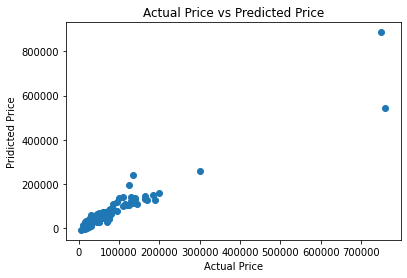

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Pridicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

# **Get Future Predictions**
Lets select a random sample from existing dataset as new sample


1.Extract a random row using sample function
2.Separate X and y
3.Predict



In [ ]:
df_new = df.sample(1)

In [ ]:
df_new

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
306,Honda,Honda CB Unicorn Dazzler,22000,2011,0,0,38350,71757.0


In [ ]:
df_new.shape

(1, 8)

In [ ]:
X_new = df_new.drop(['Brand','Model','Selling_Price'], axis=1)

In [ ]:
y_pred_new=lr.predict(X_new)

In [ ]:
y_pred_new

array([32176.52988785])